Current Working Directory: C:\Users\KIIT\Desktop\BCG data science simulation
Files in Directory: ['.ipynb_checkpoints', 'client_data.csv', 'Data Description (1).pdf', 'price_data.csv', 'Task 2 - eda_starter.ipynb', 'Untitled.ipynb']
Client Data Sample:
                                 id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   
3      1584             0   

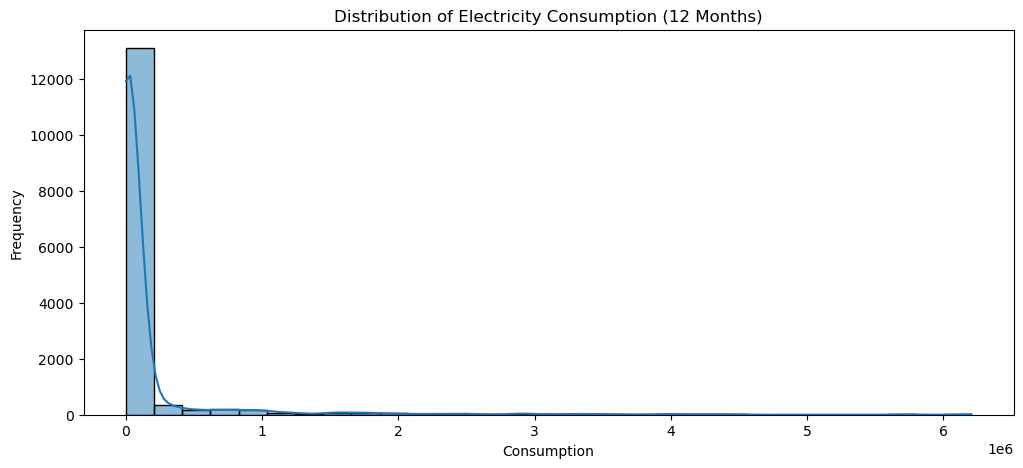

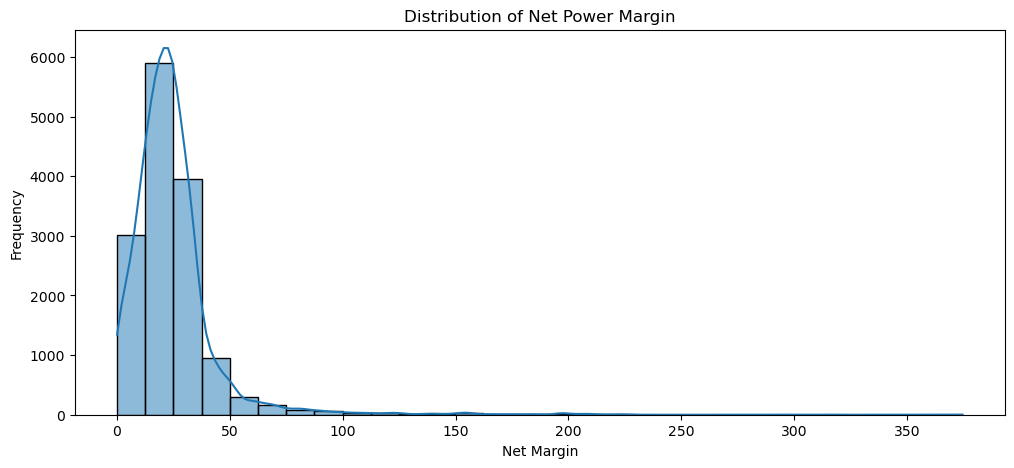

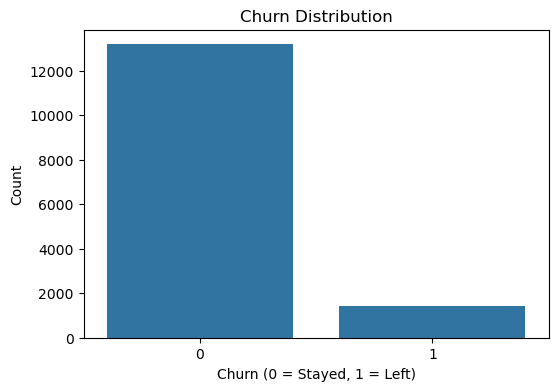

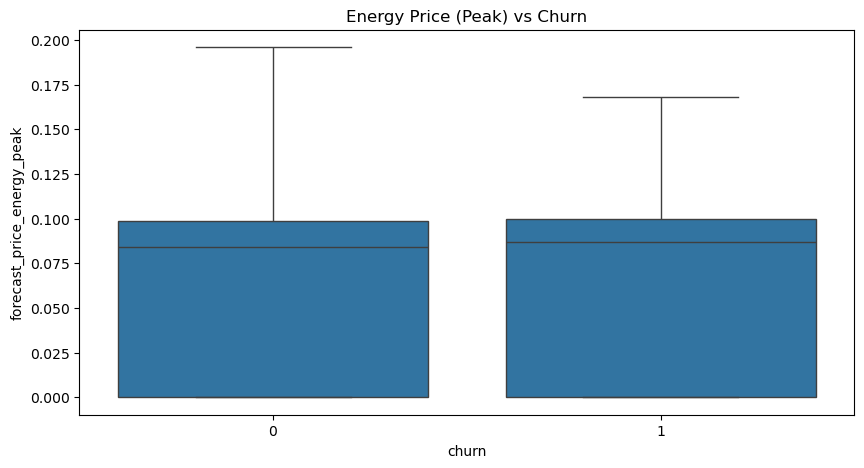

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Check and print current working directory
print("Current Working Directory:", os.getcwd())

# List files in the directory to confirm existence
print("Files in Directory:", os.listdir())

# Define correct file paths
client_file = "client_data.csv"
price_file = "price_data.csv"

# Ensure files exist before reading
if client_file not in os.listdir() or price_file not in os.listdir():
    raise FileNotFoundError("One or both CSV files are missing. Please check file names and location.")

# Load datasets
client_data = pd.read_csv(client_file)
price_data = pd.read_csv(price_file)

# Display first few rows
print("Client Data Sample:")
print(client_data.head())
print("\nPrice Data Sample:")
print(price_data.head())

# Check data types
print("\nData Types:")
print(client_data.dtypes)
print(price_data.dtypes)

# Descriptive statistics
print("\nDescriptive Statistics - Client Data:")
print(client_data.describe())
print("\nDescriptive Statistics - Price Data:")
print(price_data.describe())

# Visualizing distributions
plt.figure(figsize=(12, 5))
sns.histplot(client_data['cons_12m'].dropna(), bins=30, kde=True)
plt.title("Distribution of Electricity Consumption (12 Months)")
plt.xlabel("Consumption")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(client_data['margin_net_pow_ele'].dropna(), bins=30, kde=True)
plt.title("Distribution of Net Power Margin")
plt.xlabel("Net Margin")
plt.ylabel("Frequency")
plt.show()

# Churn analysis
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=client_data)
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = Stayed, 1 = Left)")
plt.ylabel("Count")
plt.show()

# Relationship between price and churn
if 'forecast_price_energy_peak' in client_data.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='churn', y='forecast_price_energy_peak', data=client_data.dropna(subset=['forecast_price_energy_peak']))
    plt.title("Energy Price (Peak) vs Churn")
    plt.show()
else:
    print("Column 'forecast_price_energy_peak' not found in client_data")
